# Table of Contents

# 01. Importing Libraries

# 02. Importing Data

# 03. Looking for Outliers

# 04. Data Prep for Regression Analysis

# 05. Regression Analysis

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

# 02. Importing Data

In [3]:
path = r'C:\Users\ketki\Desktop\Data Analytics bootcamp tasks\Data Immersion\Achievement 6'

In [5]:
df_2019 = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', '2019_checked.csv'), index_col = False)

In [6]:
df_2018 = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', '2018_checked.csv'), index_col = False)

In [7]:
df_2019.columns

Index(['Unnamed: 0', 'Overall rank', 'Country', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [8]:
df_2018.columns

Index(['Unnamed: 0', 'Overall rank', 'Country', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

# 03. Looking for outliers

C:\Users\ketki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP per capita', ylabel='Density'>

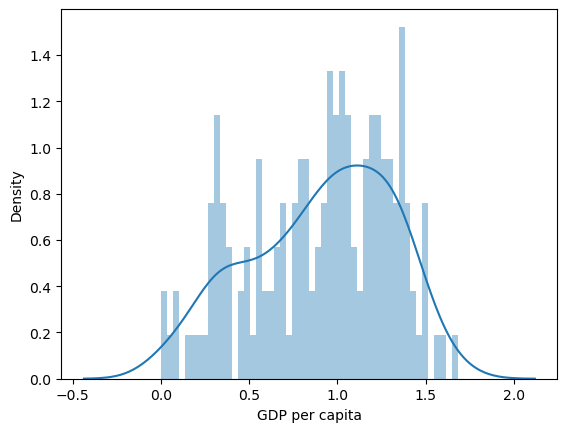

In [9]:
sns.distplot(df_2019['GDP per capita'], bins = 50)

In [11]:
df_2019['GDP per capita'].mean()

0.9051474358974363

In [12]:
df_2019['GDP per capita'].median()

0.96

In [13]:
df_2019['GDP per capita'].max()

1.684

# 04. Data prep for regression analysis

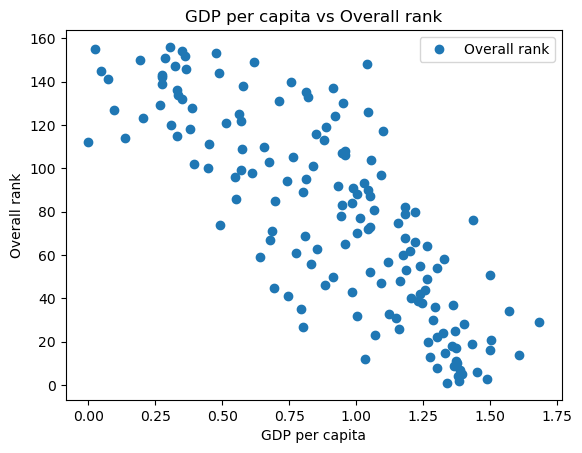

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2019.plot(x = 'GDP per capita', y = 'Overall rank', style = 'o')
plt.title('GDP per capita vs Overall rank')
plt.xlabel('GDP per capita')
plt.ylabel('Overall rank')
plt.show()


### There is a negative correlation between the GDP per capita and overall rank. Countries with higher GDP per capita do not have a higher overall rank for happiness. 

In [15]:
# reshaping the variables into Numpy arrays and putting them into separate objects

X = df_2019['GDP per capita'].values.reshape(-1,1)
y = df_2019['Overall rank'].values.reshape(-1,1)

In [16]:
X

array([[1.34 ],
       [1.383],
       [1.488],
       [1.38 ],
       [1.396],
       [1.452],
       [1.387],
       [1.303],
       [1.365],
       [1.376],
       [1.372],
       [1.034],
       [1.276],
       [1.609],
       [1.333],
       [1.499],
       [1.373],
       [1.356],
       [1.433],
       [1.269],
       [1.503],
       [1.3  ],
       [1.07 ],
       [1.324],
       [1.368],
       [1.159],
       [0.8  ],
       [1.403],
       [1.684],
       [1.286],
       [1.149],
       [1.004],
       [1.124],
       [1.572],
       [0.794],
       [1.294],
       [1.362],
       [1.246],
       [1.231],
       [1.206],
       [0.745],
       [1.238],
       [0.985],
       [1.258],
       [0.694],
       [0.882],
       [1.092],
       [1.162],
       [1.263],
       [0.912],
       [1.5  ],
       [1.05 ],
       [1.187],
       [1.301],
       [1.237],
       [0.831],
       [1.12 ],
       [1.327],
       [0.642],
       [1.173],
       [0.776],
       [1.201],
       [

In [17]:
y

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [18]:
# Split the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# 05. Regression analysis

In [19]:
regression = LinearRegression()

In [20]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
 # Predict the values of y using x
    
y_predicted = regression.predict(X_test)

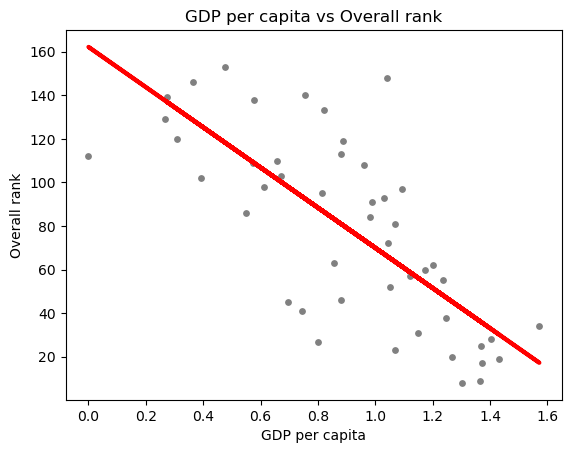

In [24]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('GDP per capita vs Overall rank')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Overall rank')
plot_test.show()

In [25]:
# Creating objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [26]:
# Printing the model summary statistics

print('Slope:' , regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[-92.18927895]]
Mean squared error: 878.7148860773971
R2 score: 0.5213161545354272


### Here, the MSE is 878.71 which is quite large, so we can say that a regression may not be the best model to represent this data.

### Here the r-squared value is 0.52131. This means that the model isn't that great of a fit.

In [27]:
y_predicted

array([[ 88.41491137],
       [ 48.12819647],
       [ 47.29849296],
       [ 81.13195833],
       [ 36.05140093],
       [ 42.04370406],
       [ 80.8553905 ],
       [ 73.66462674],
       [108.8809313 ],
       [ 93.48532171],
       [ 71.17551621],
       [ 65.36759163],
       [109.24968841],
       [133.77203661],
       [ 58.91434211],
       [ 66.19729514],
       [ 17.24478802],
       [ 80.48663338],
       [ 98.18697494],
       [137.45960777],
       [128.42505844],
       [ 36.32796876],
       [ 92.56342892],
       [ 54.02831032],
       [162.16633453],
       [118.28423775],
       [111.37004183],
       [ 83.34450103],
       [ 71.54427332],
       [ 87.21645074],
       [ 35.59045453],
       [ 45.17813954],
       [ 86.57112579],
       [105.83868509],
       [ 63.52380605],
       [ 63.80037389],
       [125.9359479 ],
       [100.1229498 ],
       [ 67.30356649],
       [ 32.82477616],
       [101.59797826],
       [136.81428282],
       [ 61.49564192],
       [ 30

In [33]:
# Creating a dataframe that compares the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,27,88.414911
1,55,48.128196
2,38,47.298493
3,113,81.131958
4,25,36.051401
5,8,42.043704
6,46,80.855390
7,108,73.664627
8,138,108.880931
9,41,93.485322


### There is quite a difference between the actual and predicted y values. This tells us that the model is  not doing a great job of explaining the relationship between the two variables.

In [29]:
# Comparing how the regression fits the training set

y_predicted_train = regression.predict(X_train)

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:',regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[-92.18927895]]
Mean squared error: 657.318520875679
R2 score: 0.6885886954029858


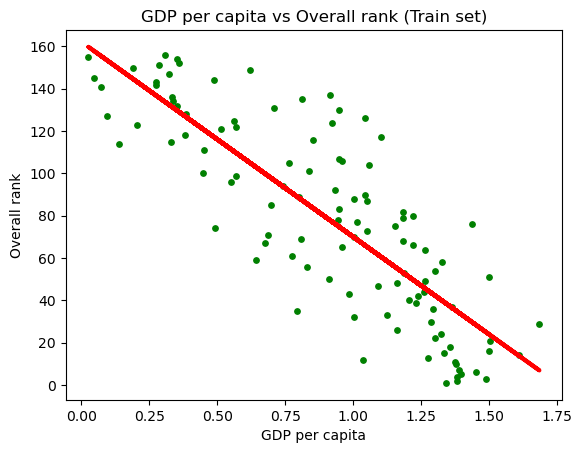

In [32]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s = 15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('GDP per capita vs Overall rank (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Overall rank')
plot_test.show()